For this stream of thought I will be working with CardioGoodFitness.csv file from CDC.gov. This is a small dataset with only 180 entries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CardioGoodFitness.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [21]:
# Descriptive statistics  
print(df.describe())

              Age      Gender   Education       Usage     Fitness  \
count  180.000000  180.000000  180.000000  180.000000  180.000000   
mean    28.788889    0.577778   15.572222    3.455556    3.311111   
std      6.943498    0.495291    1.617055    1.084797    0.958869   
min     18.000000    0.000000   12.000000    2.000000    1.000000   
25%     24.000000    0.000000   14.000000    3.000000    3.000000   
50%     26.000000    1.000000   16.000000    3.000000    3.000000   
75%     33.000000    1.000000   16.000000    4.000000    4.000000   
max     50.000000    1.000000   21.000000    7.000000    5.000000   

              Income       Miles  
count     180.000000  180.000000  
mean    53719.577778  103.194444  
std     16506.684226   51.863605  
min     29562.000000   21.000000  
25%     44058.750000   66.000000  
50%     50596.500000   94.000000  
75%     58668.000000  114.750000  
max    104581.000000  360.000000  


Worked through the data to clean it up. Now, let's check out some **EDA**

Text(0, 0.5, 'Frequency')

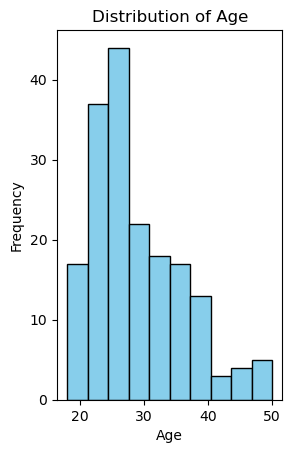

In [22]:
# Example: Histogram of Age  
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Interesting the data shows that the pool with the most active participants are in their twenties, early thirties. 

Text(0, 0.5, 'Miles')

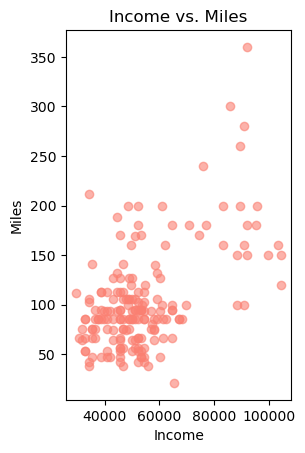

In [9]:
# Example: Scatter plot of Income vs. Miles  
plt.subplot(1, 2, 2)
plt.scatter(df['Income'], df['Miles'], color='salmon', alpha=0.6)
plt.title('Income vs. Miles')
plt.xlabel('Income')
plt.ylabel('Miles')

This looks at the distribution shows the scatter plot of Income to Miles, which would be interesting to see if there's a correlation here. The see what the income to age looks like.

In [10]:
import seaborn as sns

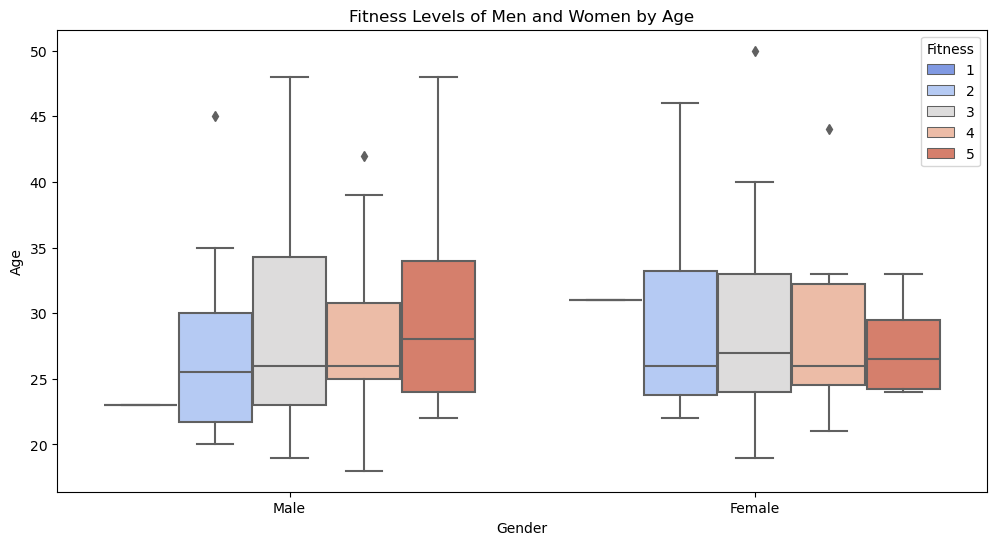

In [11]:
# Create a boxplot or violin plot to compare fitness levels of men and women by age  
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Age', hue='Fitness', data=df, palette='coolwarm')
plt.title('Fitness Levels of Men and Women by Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Fitness')
plt.show()

Here are some key observations from the data:<br>

For females, the highest number of individuals across different age groups are mostly at fitness levels 3 and 2.<br>

There are variations in the distribution of fitness levels among females across different age groups, with some age groups having more individuals at higher fitness levels.<br>

For males, the distribution of fitness levels also varies across age groups, with fitness level 3 being prominent in some age groups.<br>

Fitness level 3 appears to be common among both males and females in several age groups.<br>

There are instances of individuals at fitness levels 4 and 5, indicating higher fitness levels in some cases.<br> 

We visualize fitness levels by gender and age using bar plots and box plots.<br>
We identify trends over time by plotting line graphs.<br>
We conduct a statistical test (t-test) to compare fitness level 3 between genders.<br>
We demonstrate predictive modeling with linear regression to predict fitness levels based on age.<br>

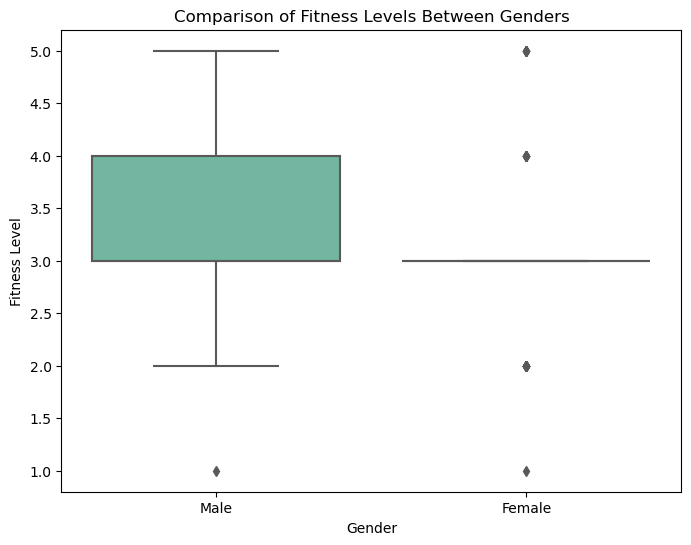

In [12]:
# Compare Fitness Levels Between Genders  
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Fitness', data=df, palette='Set2')
plt.title('Comparison of Fitness Levels Between Genders')
plt.xlabel('Gender')
plt.ylabel('Fitness Level')
plt.show()

C:\Users\ebdai\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ebdai\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


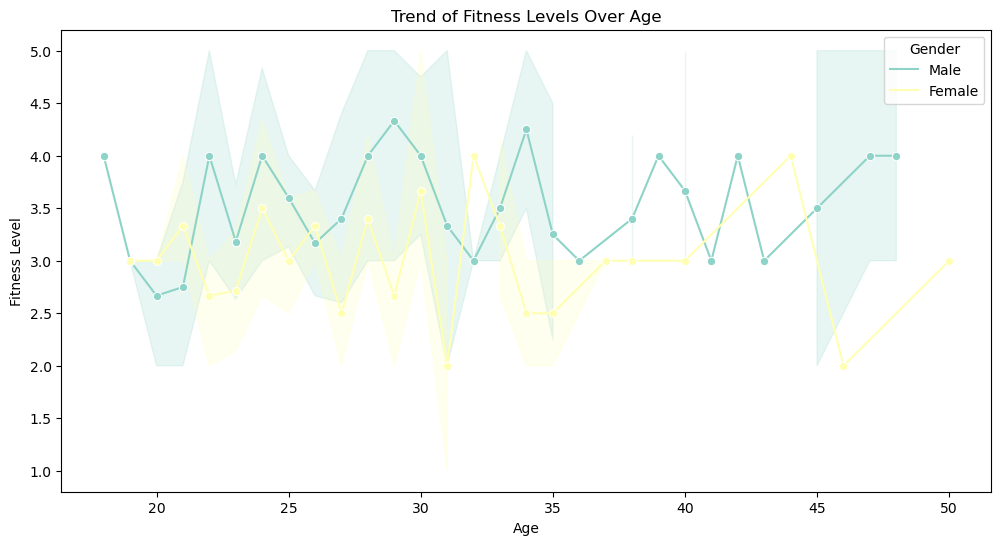

In [13]:
# Identify Trends Over Time  
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Fitness', hue='Gender', data=df, marker='o', palette='Set3')
plt.title('Trend of Fitness Levels Over Age')
plt.xlabel('Age')
plt.ylabel('Fitness Level')
plt.legend(title='Gender')
plt.show()

In [14]:
# Statistical Analysis (Example: t-test for Fitness Level 3 between Genders)
from scipy import stats  
male_fitness_3 = df[df['Gender'] == 'Male']['Fitness'].apply(lambda x: 1 if x == 3 else 0)
female_fitness_3 = df[df['Gender'] == 'Female']['Fitness'].apply(lambda x: 1 if x == 3 else 0)
t_stat, p_value = stats.ttest_ind(male_fitness_3, female_fitness_3)
print(f"T-test for Fitness Level 3 between Genders - t-statistic: {t_stat}, p-value: {p_value}")

T-test for Fitness Level 3 between Genders - t-statistic: -1.222669509350161, p-value: 0.22307095673026486


In [15]:
# Predictive Modeling (Example: Linear Regression)
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split

In [16]:
X = df[['Age']]
y = df['Fitness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print(f"Linear Regression Coefficients: {model.coef_}")

Linear Regression Coefficients: [0.01134189]


***T-test for Fitness Level 3 between Genders:*** <br>

* T-statistic: The t-statistic value of approximately -1.22 indicates the difference in the mean fitness level 3 between genders.
P-value: The p-value of approximately 0.223 suggests the probability of observing the t-statistic result if there were no true difference in fitness level 3 between genders.<br>

* Interpretation: With a p-value greater than the typical significance level of 0.05, we do not have enough evidence to reject the null hypothesis that there is no significant difference in fitness level 3 between males and females.
Linear Regression Coefficients:<br>

The linear regression coefficient of approximately 0.0113 indicates the change in the predicted fitness level for each unit increase in age.
Interpretation: For every one-unit increase in age, the predicted fitness level is expected to increase by 0.0113 units based on the linear regression model.<br>

Overall, the results suggest that there is no significant difference in fitness level 3 between males and females based on the t-test analysis. Additionally, the linear regression coefficient indicates a slight positive relationship between age and predicted fitness levels. These findings provide valuable insights into the relationship between gender, age, and fitness levels in the dataset.

Correlation Matrix:
              Age   Fitness
Age      1.000000  0.061105
Fitness  0.061105  1.000000


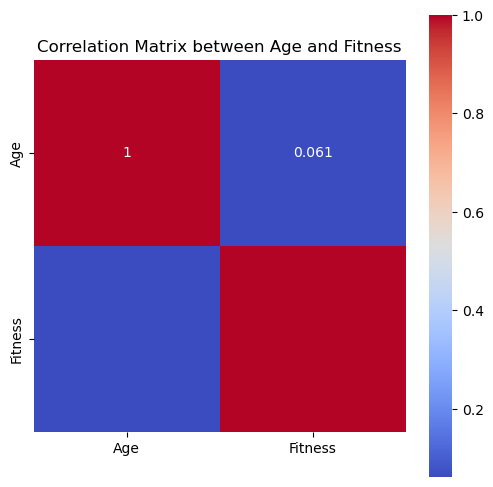

In [17]:
# Explore Correlations  
correlation_matrix = df[['Age', 'Fitness']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualization of Correlations  
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix between Age and Fitness')
plt.show()

C:\Users\ebdai\anaconda4\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ebdai\anaconda4\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ebdai\anaconda4\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

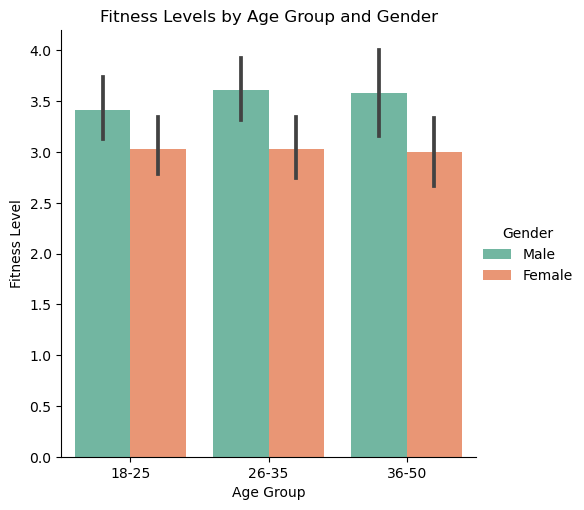

In [18]:
# Segmentation Analysis (Example: Segment by Age Groups)
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 50], labels=['18-25', '26-35', '36-50'])
sns.catplot(x='Age_Group', y='Fitness', hue='Gender', data=df, kind='bar', palette='Set2')
plt.title('Fitness Levels by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Fitness Level')
plt.show()

**Key Findings:** <br>
* Demographics: The average age is approximately 28.8 years, with a mix of genders and education levels. <br>
* Income: The average income is around $53,720, ranging from $29,562 to $104,581. <br>
* Usage and Fitness: The average usage score is about 3.46, and the average fitness score is around 3.31, indicating moderate engagement with fitness products. <br>

**Conclusions:** <br>

* The dataset provides insights into the demographics and engagement levels of users of CardioGoodFitness products. <br>
* A potential correlation exists between income, education, and fitness engagement, which could be explored further in detailed analyses. <br>

**References:** <br>
Centers for Disease Control and Prevention. (n.d.). CardioGoodFitness dataset. Retrieved from https://www.cdc.gov originally - sourced from Kaggle.com

McKinney, W. (2010). Data analysis with pandas. O'Reilly Media.

Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. https://doi.org/10.1109/MCSE.200tails)